In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('full.csv')

In [97]:
df

,Date,Visits
0,01-07-2015,1195.856567
1,02-07-2015,1204.003638
2,03-07-2015,1133.675969
3,04-07-2015,1170.437324
4,05-07-2015,1217.769300
...,...,...
545,27-12-2016,1678.301870
546,28-12-2016,1633.965605
547,29-12-2016,1684.307717
548,30-12-2016,1467.943378


<AxesSubplot:>

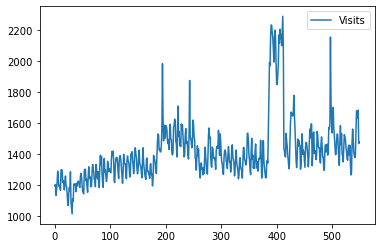

In [98]:
df.plot()

In [99]:
df.columns = ['ds','y']

In [100]:
df.head()

,ds,y
0,01-07-2015,1195.856567
1,02-07-2015,1204.003638
2,03-07-2015,1133.675969
3,04-07-2015,1170.437324
4,05-07-2015,1217.769300


In [116]:
df.tail()

,ds,y
545,27-12-2016,1678.301870
546,28-12-2016,1633.965605
547,29-12-2016,1684.307717
548,30-12-2016,1467.943378
549,31-12-2016,1478.282137


In [107]:
df_train = df[:499]
df_test = df[500:]

In [117]:
df_train

,ds,y
0,01-07-2015,1195.856567
1,02-07-2015,1204.003638
2,03-07-2015,1133.675969
3,04-07-2015,1170.437324
4,05-07-2015,1217.769300
...,...,...
494,06-11-2016,1571.925233
495,07-11-2016,1561.038450
496,08-11-2016,1591.314742
497,09-11-2016,2156.054809


In [118]:
df_test

,ds,y
500,12-11-2016,1536.471757
501,13-11-2016,1679.630589
502,14-11-2016,1701.941831
503,15-11-2016,1564.172228
504,16-11-2016,1520.673959
505,17-11-2016,1463.751937
506,18-11-2016,1396.544145
507,19-11-2016,1399.170412
508,20-11-2016,1482.018739
509,21-11-2016,1529.844585


In [109]:
from fbprophet import Prophet

In [110]:
model = Prophet()

In [111]:
model.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [112]:
df_test.shape

(50, 2)

In [126]:
future_dates =pd.DataFrame(df['ds'])

In [127]:
future_dates.columns = ['ds']

In [128]:
future_dates

,ds
0,01-07-2015
1,02-07-2015
2,03-07-2015
3,04-07-2015
4,05-07-2015
...,...
545,27-12-2016
546,28-12-2016
547,29-12-2016
548,30-12-2016


In [129]:
prediction = model.predict(future_dates)

In [130]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
545,2016-12-27,1542.963191,1374.669633,1823.955055,1542.800765,1543.223357,32.593716,32.593716,32.593716,32.593716,32.593716,32.593716,0.0,0.0,0.0,1575.556907
546,2016-12-28,1543.180776,1293.377773,1754.415846,1542.992245,1543.478797,-14.582363,-14.582363,-14.582363,-14.582363,-14.582363,-14.582363,0.0,0.0,0.0,1528.598413
547,2016-12-29,1543.398361,1290.138799,1746.936786,1543.184659,1543.739560,-25.206449,-25.206449,-25.206449,-25.206449,-25.206449,-25.206449,0.0,0.0,0.0,1518.191912
548,2016-12-30,1543.615946,1293.947028,1745.522263,1543.381581,1543.993850,-30.234154,-30.234154,-30.234154,-30.234154,-30.234154,-30.234154,0.0,0.0,0.0,1513.381792
549,2016-12-31,1543.833530,1281.222316,1715.834871,1543.578875,1544.245347,-38.060410,-38.060410,-38.060410,-38.060410,-38.060410,-38.060410,0.0,0.0,0.0,1505.773120


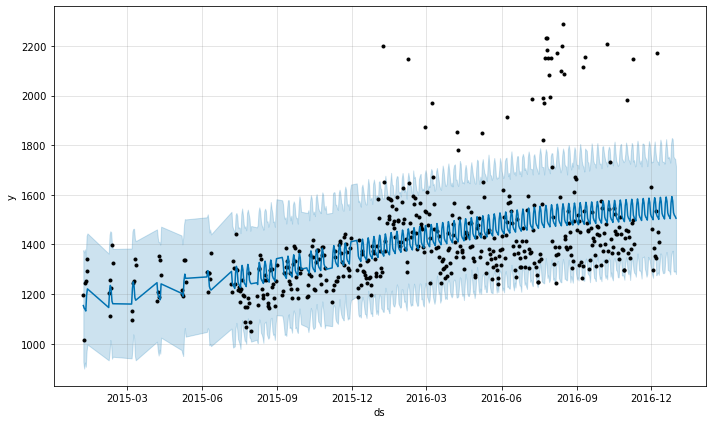

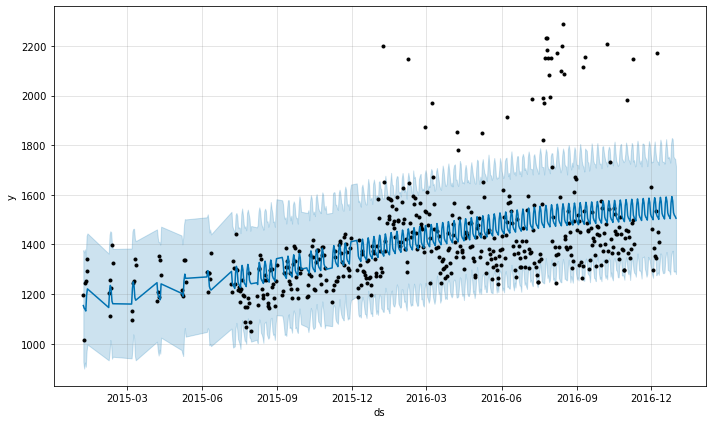

In [131]:
model.plot(prediction)

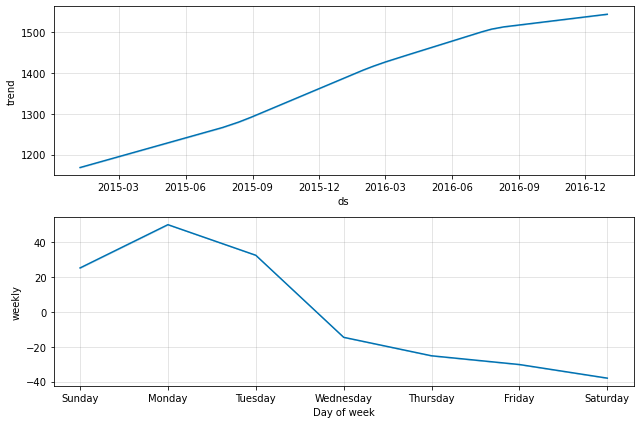

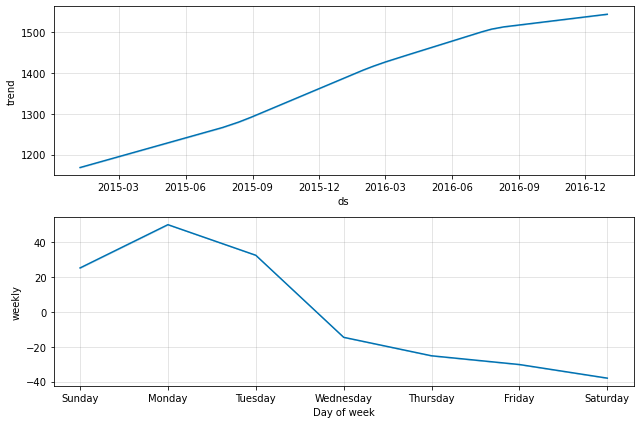

In [132]:
model.plot_components(prediction)

In [134]:
 df_test['y_pred'] = prediction['yhat'][500:]

<ipython-input-134-5863bded153c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_pred'] = prediction['yhat'][500:]


In [137]:
df_test

,ds,y,y_pred
500,12-11-2016,1536.471757,1495.111470
501,13-11-2016,1679.630589,1558.697244
502,14-11-2016,1701.941831,1583.788929
503,15-11-2016,1564.172228,1566.418350
504,16-11-2016,1520.673959,1519.459855
505,17-11-2016,1463.751937,1509.053354
506,18-11-2016,1396.544145,1504.243234
507,19-11-2016,1399.170412,1496.634563
508,20-11-2016,1482.018739,1560.220337
509,21-11-2016,1529.844585,1585.312022


In [135]:
from sklearn.metrics import mean_squared_error

In [138]:
mean_squared_error(df_test['y'], df_test['y_pred'])

12191.650706893792

In [139]:
df['y_pred'] = df_test['y_pred']

In [145]:
df.iloc[499]['y'] = df.iloc[499]['y_pred']

<ipython-input-145-1b2e39def6cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[499]['y'] = df.iloc[499]['y_pred']


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


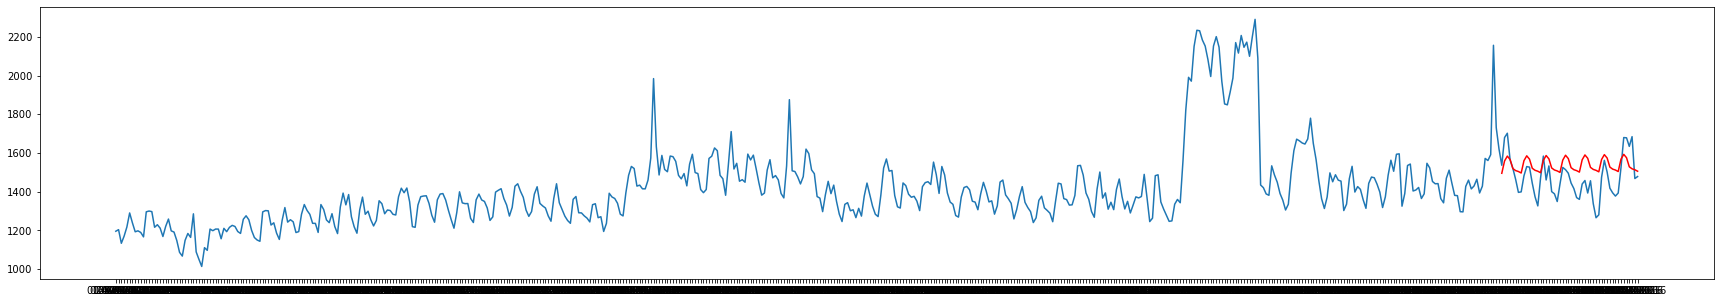

In [146]:
plt.figure(figsize=(30, 5))
plt.plot(df.ds,df.y)
plt.plot(df.ds,df.y_pred,color='r')
plt.show()